<a href="https://colab.research.google.com/github/chhavi007-bit/Doctor-Patient-Conversation-Analysis-/blob/main/CANCER__PATIENT__ML_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cancer patient datasets ML-Models  kNN , Random Forest**                        
Team Members: Batch-3
1. chhavi chadha
2. Taiyaba Akhtar
3. Anil Kumar
4. Tejaswi Kumar
5. sriram Mahesh



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import gspread

Loading dataset

In [ ]:
from google.colab import auth
# Authenticate and authorize Google Sheets access
auth.authenticate_user()
from google.auth import default
creds, _ = default()


gc = gspread.authorize(creds)

# Replace 'Your spreadsheet name' with the actual name of your spreadsheet
# Replace 'Sheet1' with the name of the sheet you want to access
# Replace 'NewDataSet' with the correct name of your spreadsheet
worksheet = gc.open('CorrectSpreadsheetName').worksheet('Sheet')
 # Load data into a pandas DataFrame
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
df.shape


In [ ]:
df.describe()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,40,2,8,8,8,8,7,7,7,...,8,8,8,8,8,9,7,7,7,3
top,P1,35,1,6,2,7,7,7,6,7,...,3,2,2,2,1,2,3,2,2,High
freq,1,77,598,326,202,405,365,327,308,296,...,212,280,243,240,221,240,230,251,300,365


Data Preprocessing

remove unnecessary columns (Patient Id) removed / dropped for
Improved Model Performance
-  Do not have a logical or statistical relationship with the target variable.

In [ ]:
# Remove 'Patient Id' column
df = df.drop(columns=['Patient Id'], axis=1)
df.shape

(1000, 24)

In [ ]:
# Convert categorical 'Level' column to numeric for better computation
df['Level_numeric'] = df['Level'].map({'High': 1, 'Medium': 2, 'Low': 3})
print(df['Level_numeric'])

0      3
1      2
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Level_numeric, Length: 1000, dtype: int64


In [ ]:
df = df.drop(columns=['Level'], axis =1)


In [ ]:
df.shape

(1000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   object
 1   Gender                    1000 non-null   object
 2   Air Pollution             1000 non-null   object
 3   Alcohol use               1000 non-null   object
 4   Dust Allergy              1000 non-null   object
 5   OccuPational Hazards      1000 non-null   object
 6   Genetic Risk              1000 non-null   object
 7   chronic Lung Disease      1000 non-null   object
 8   Balanced Diet             1000 non-null   object
 9   Obesity                   1000 non-null   object
 10  Smoking                   1000 non-null   object
 11  Passive Smoker            1000 non-null   object
 12  Chest Pain                1000 non-null   object
 13  Coughing of Blood         1000 non-null   object
 14  Fatigue                  

Make all values numeric

In [ ]:
# Ensure all columns are numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

(1000, 24)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

**Split the data


In [ ]:
# Split the data into features and target variable
X = df.iloc[:,0:23]
Y = df.iloc[:,23]#target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#test data 20% of data will be taken (test_size)

 Feature Scaling

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

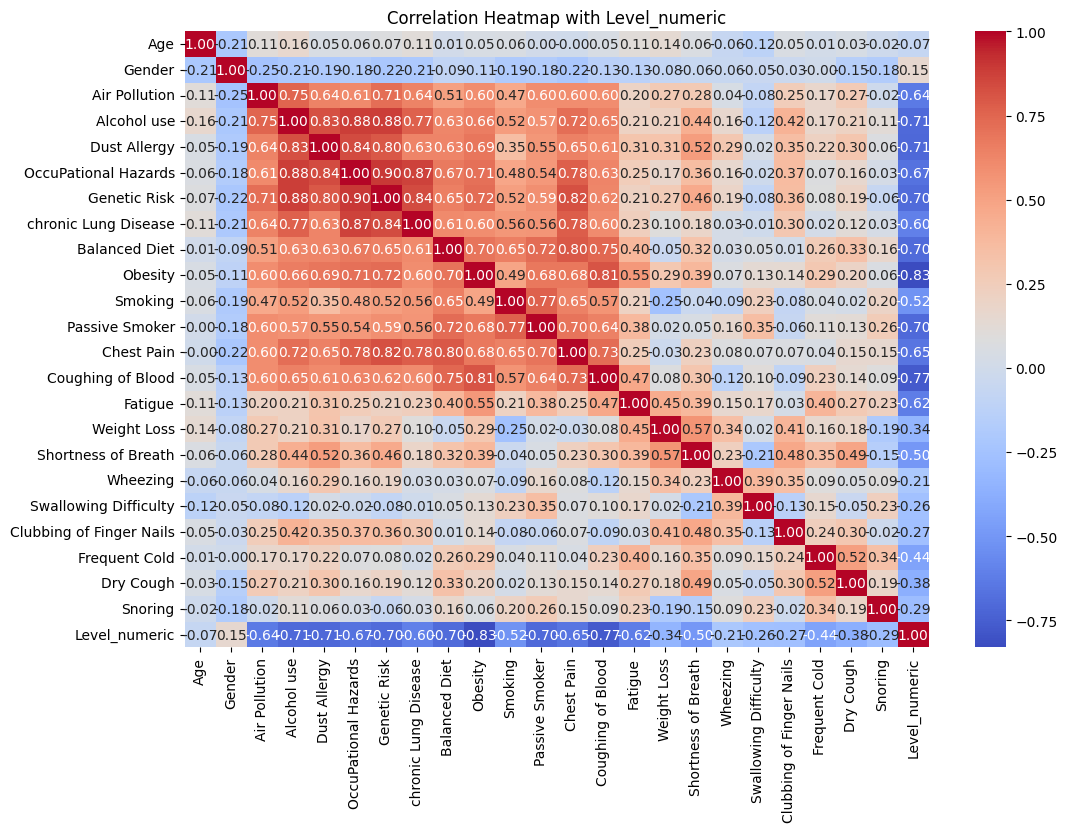

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = pd.DataFrame(X_train, columns=df.columns[:-1])
correlation_matrix['Level_numeric'] = Y_train.reset_index(drop=True)
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Level_numeric')
plt.show()

**knn classifier**

Parameter Tuning:
- The script uses the square root of the test dataset size to select k (number of neighbors).
sqrt. for finding value of k

In [ ]:
#sqrt. for finding value of k
import math
math.sqrt(len(Y_test))

14.142135623730951

define model

In [ ]:
 # Chosen as an odd number close to sqrt of dataset size
classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')
classifier.fit(X_train, Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=13)

fit model

predict test set results

In [ ]:
# Predict test set results using KNN
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2,
       2, 3, 3, 2, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2, 2,
       3, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 2, 2, 1, 2, 2, 3, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 1, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 3, 3, 2, 3, 3, 2, 1, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 1, 3, 3, 3, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1,
       1, 2])

to evaluate model e use confusion matrix

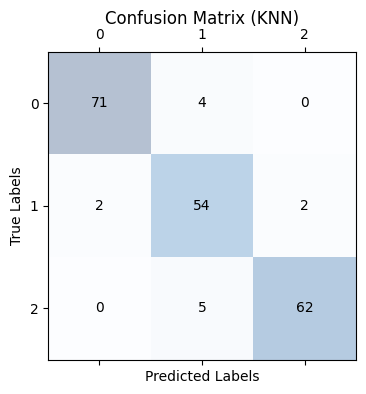

Confusion Matrix (KNN):
 [[71  4  0]
 [ 2 54  2]
 [ 0  5 62]]
F1 Score (KNN): 0.9357395091451302
Accuracy Score (KNN): 0.935


In [ ]:
# Evaluate KNN model
cm = confusion_matrix(Y_test, Y_pred)
knn_confusion_matrix = confusion_matrix(Y_test, Y_pred)

# Visualization of Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 4))
ax.matshow(knn_confusion_matrix, cmap='Blues', alpha=0.3)
for i in range(knn_confusion_matrix.shape[0]):
    for j in range(knn_confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=knn_confusion_matrix[i, j], va='center', ha='center')

plt.title("Confusion Matrix (KNN)", pad=20)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(range(knn_confusion_matrix.shape[1]))
plt.yticks(range(knn_confusion_matrix.shape[0]))
plt.show()

print("Confusion Matrix (KNN):\n", knn_confusion_matrix)
print("F1 Score (KNN):", f1_score(Y_test, Y_pred, average='weighted'))
print("Accuracy Score (KNN):", accuracy_score(Y_test, Y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'X' and 'Y' are your original features and target
sc_X = StandardScaler()  # Create a StandardScaler object
X_scaled = sc_X.fit_transform(X)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled, Y, cv=10)
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 1.0


**Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Initialize and Train Random Forest Classifier

In [ ]:
# Predict test set results using Random Forest
y_pred = rf_model.predict(X_test)

model accuracy

In [ ]:
# Evaluate Random Forest model
accuracy = accuracy_score(Y_test, Y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.935


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'X' and 'Y' are your original features and target
sc_X = StandardScaler()  # Create a StandardScaler object
X_scaled = sc_X.fit_transform(X)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100), X_scaled, Y, cv=10)
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 1.0
